<a href="https://colab.research.google.com/github/Oruka01/Food-Sale-Predictions/blob/main/Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [300]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [301]:
import pandas as pd

In [302]:
# Loading the data and showing the head
First_choice_data = '/content/drive/MyDrive/in-vehicle-coupon-recommendation.csv'
df = pd.read_csv(First_choice_data)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


1) Source of data

*   https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation
*   Tong Wang, tong-wang '@' uiowa.edu, University of Iowa
*   Cynthia Rudin, cynthia '@' cs.duke.edu, Duke University






2) Brief description of data

*   Abstract: This data studies whether a person will accept the coupon recommended to him in different driving scenarios




3) What is the target?


the traget is Y:1, 0 (whether the coupon is accepted)

4) Is this a classification or regression problem?

This is a classification problem

5) How many features?

In [303]:
df.shape
# There are 26 features

(12684, 26)

6) How many rows of data.


there are 12684 rows

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

In [304]:
df.info()
# From the info below, i have to deal with missing values, irrelevant rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Dropping the unnecessary columns

In [305]:
# Lets drop these columns because they do not have significant influence on the
# decision wether person will accept a coupon or not

import pandas as pd

df = df.drop(['maritalStatus','has_children','car','direction_opp','passanger','education','toCoupon_GEQ5min'], axis=1)

Identifying and deleting duplicate rows

In [306]:
# Identifying the duplicates in the dataframe
df.duplicated().sum()

189

In [307]:
# Droping th duplicates
df = df.drop_duplicates()

Identifying and addressing missing values 

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12495 entries, 0 to 12683
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12495 non-null  object
 1   weather               12495 non-null  object
 2   temperature           12495 non-null  int64 
 3   time                  12495 non-null  object
 4   coupon                12495 non-null  object
 5   expiration            12495 non-null  object
 6   gender                12495 non-null  object
 7   age                   12495 non-null  object
 8   occupation            12495 non-null  object
 9   income                12495 non-null  object
 10  Bar                   12388 non-null  object
 11  CoffeeHouse           12280 non-null  object
 12  CarryAway             12347 non-null  object
 13  RestaurantLessThan20  12368 non-null  object
 14  Restaurant20To50      12307 non-null  object
 15  toCoupon_GEQ15min     12495 non-null

Dealing missing values in the Bar column

In [309]:
df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [310]:
# Getting the non-null values in the column
Av_values = df['Bar'].count()
Av_values

12388

In [311]:
# Getting the missing values in the column
null = len(df) - df['Bar'].count()
null

107

In [312]:
# Based on the number of the missing values as compared to ther available values, lets to drop the missing values 
# because they are not significantly many to cause a big change in the resultant analysis

df.dropna(subset=['Bar'], inplace=True)

<ipython-input-312-b82e698f1161>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Bar'], inplace=True)


Dealing missing values in the CoffeeHouse column

In [313]:
df['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [314]:
# Getting the non-null values in the column
Av_values = df['CoffeeHouse'].count()
Av_values

12215

In [315]:
# Getting the missing values in the column
null = len(df) - df['CoffeeHouse'].count()
null

173

In [316]:
# Based on the number of the missing values as compared to ther available values, lets to drop the missing values 
# because they are not significantly many to cause a big change in the resultant analysis

df.dropna(subset=['CoffeeHouse'], inplace=True)

<ipython-input-316-22865344db4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['CoffeeHouse'], inplace=True)


Dealing missing values in the CarryAway column

In [317]:
# Getting the non-null values in the column
Av_values = df['CarryAway'].count()
Av_values

12109

In [318]:
# Getting the missing values in the column
null = len(df) - df['CarryAway'].count()
null

106

In [319]:
# Based on the number of the missing values as compared to ther available values, lets to drop the missing values 
# because they are not significantly many to cause a big change in the resultant analysis

df.dropna(subset=['CarryAway'], inplace=True)

Dealing missing values in the RestaurantLessThan20 column

In [320]:
# Getting the non-null values in the column
Av_values = df['RestaurantLessThan20'].count()
Av_values

12024

In [321]:
# Getting the missing values in the column
null = len(df) - df['RestaurantLessThan20'].count()
null

85

In [322]:
# Based on the number of the missing values as compared to ther available values, lets to drop the missing values 
# because they are not significantly many to cause a big change in the resultant analysis

df.dropna(subset=['RestaurantLessThan20'], inplace=True)

Dealing missing values in the Restaurant20To50 column

In [323]:
# Getting the non-null values in the column
Av_values = df['Restaurant20To50'].count()
Av_values

11898

In [324]:
# Getting the missing values in the column
null = len(df) - df['Restaurant20To50'].count()
null

126

In [325]:
# Based on the number of the missing values as compared to ther available values, lets to drop the missing values 
# because they are not significantly many to cause a big change in the resultant analysis

df.dropna(subset=['Restaurant20To50'], inplace=True)

In [326]:
# Lets confirm if these were all dropped
df.isna().sum()

destination             0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
Y                       0
dtype: int64

producing univariate visuals for the target and all features

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

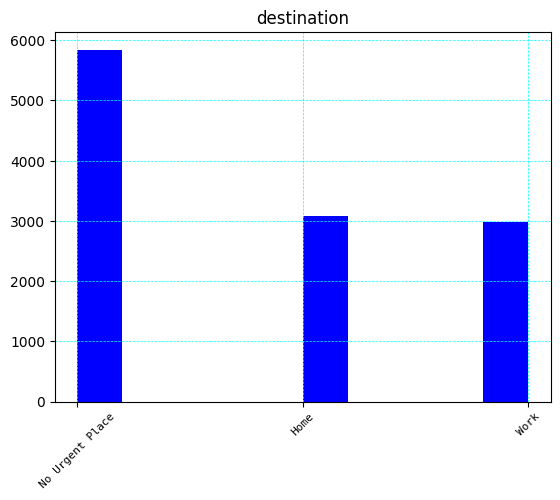

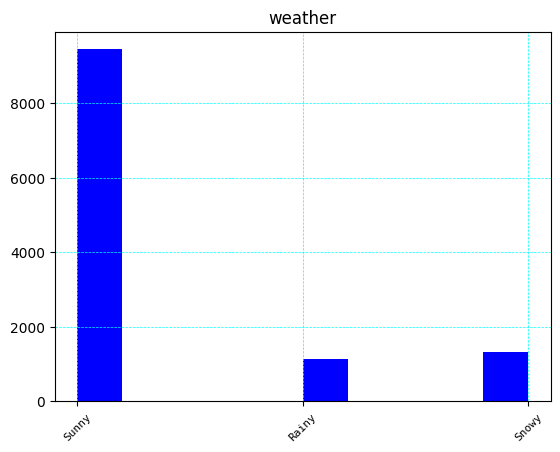

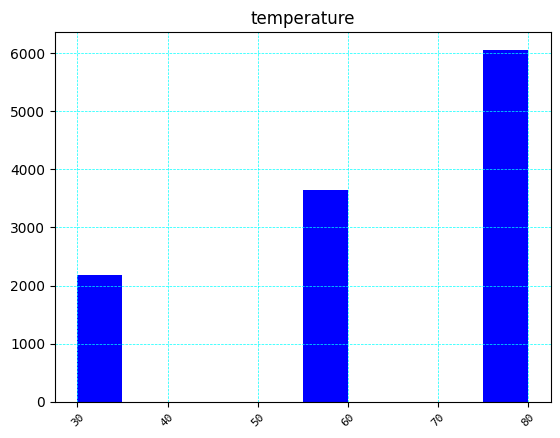

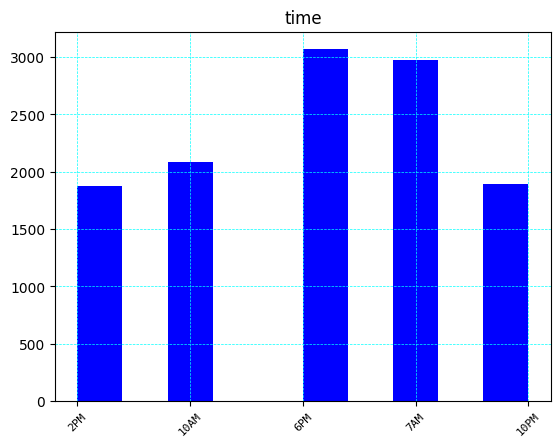

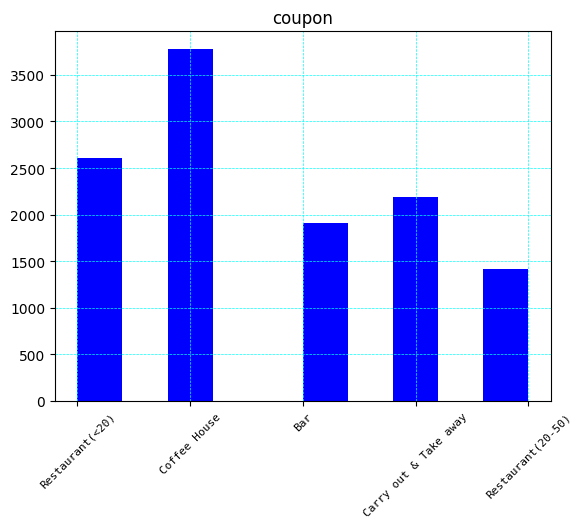

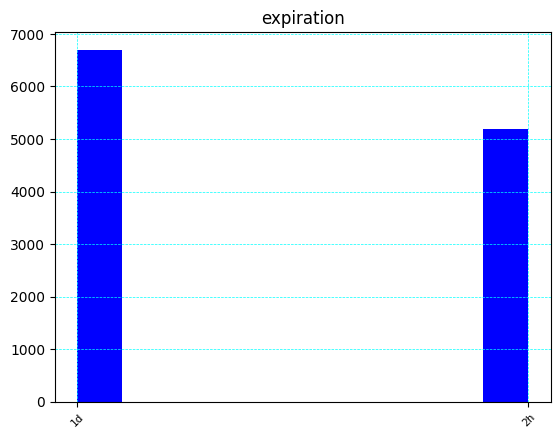

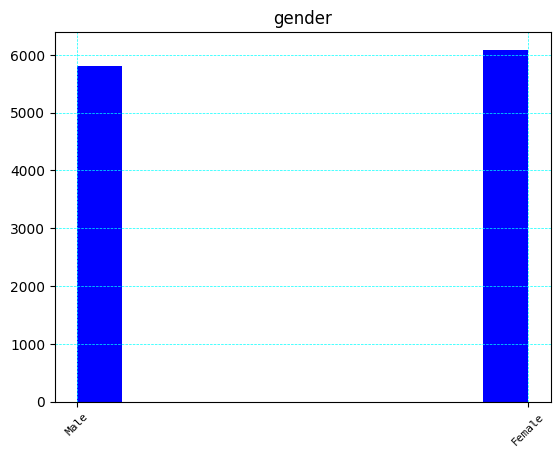

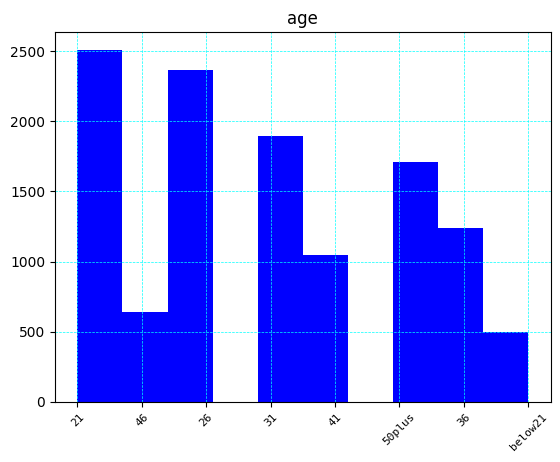

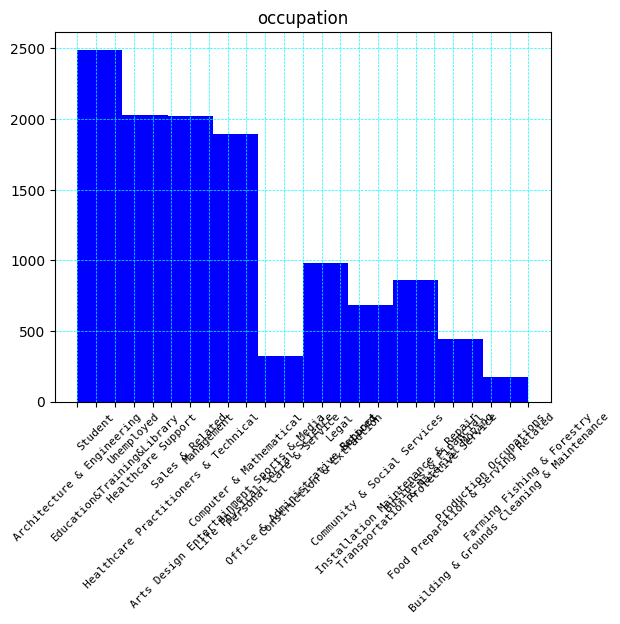

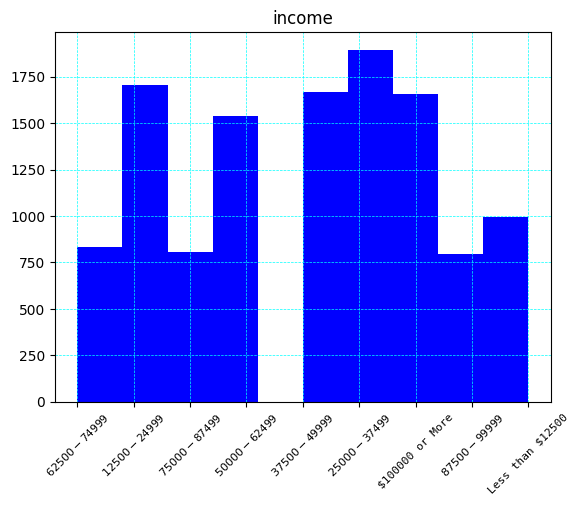

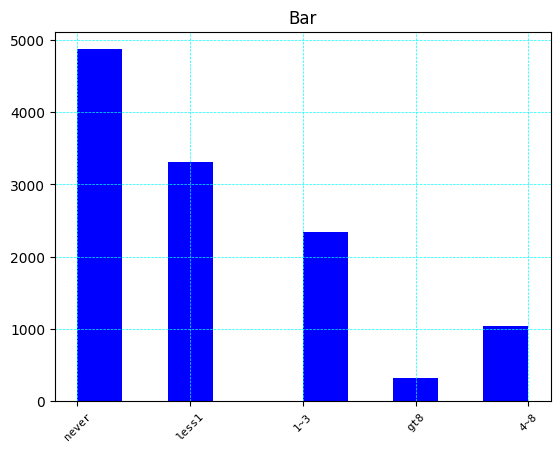

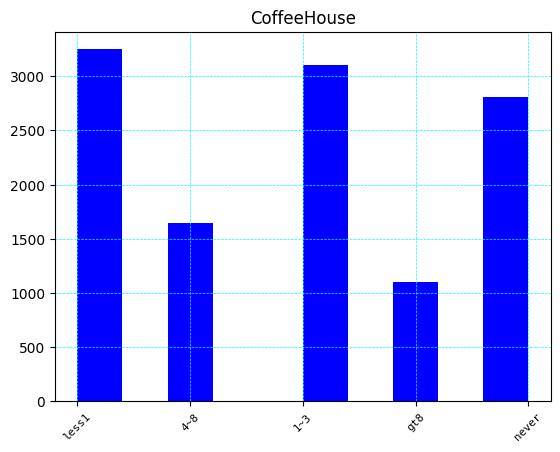

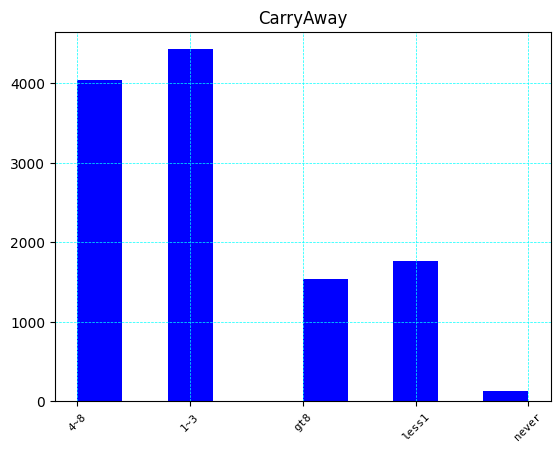

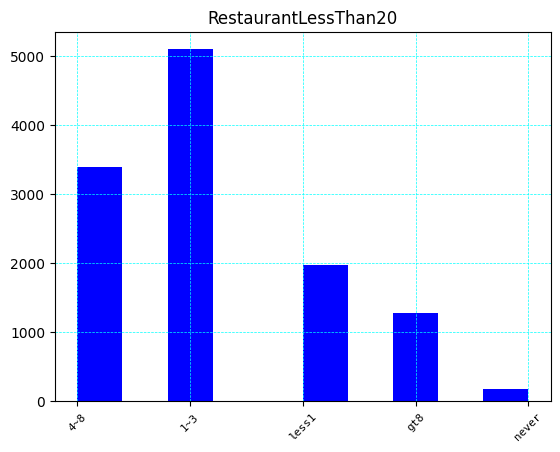

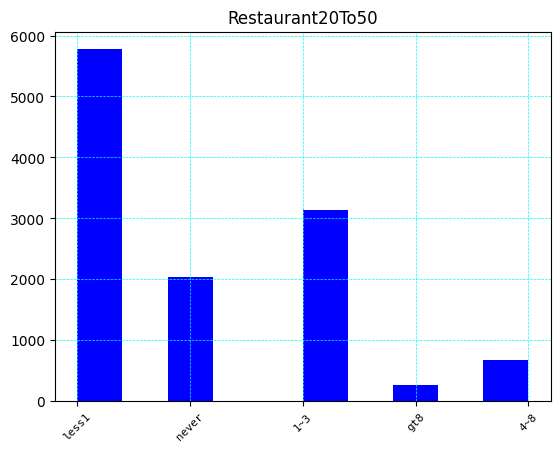

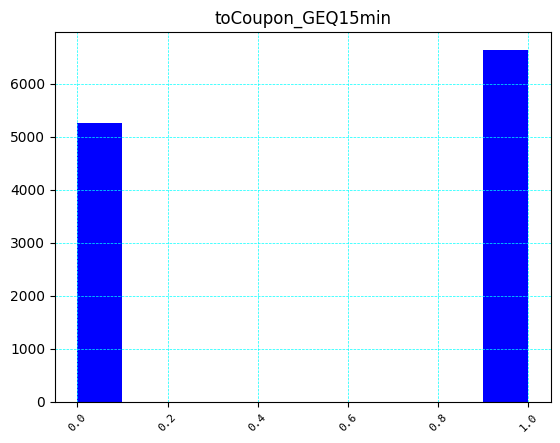

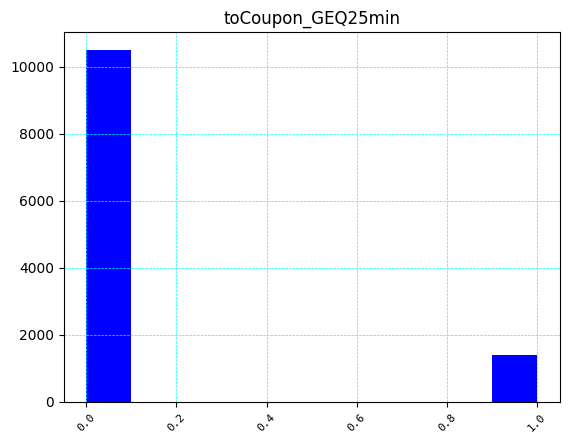

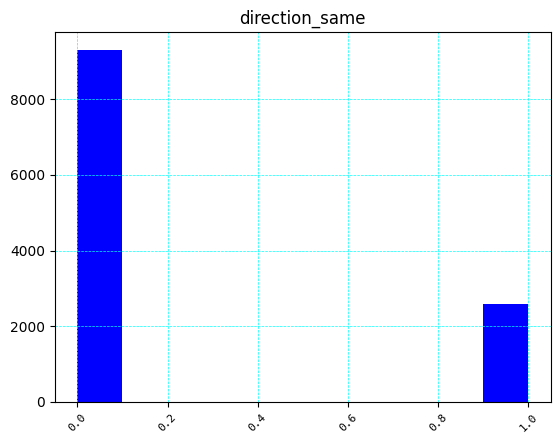

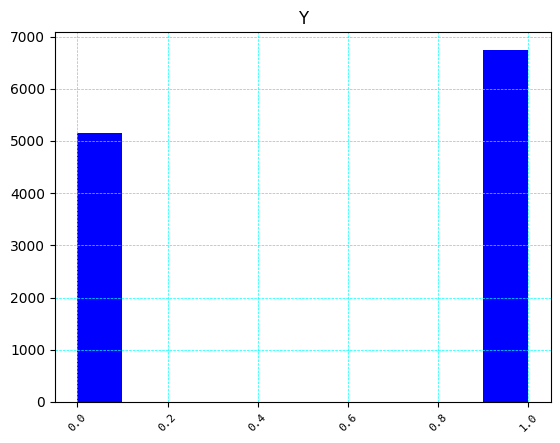

In [352]:
for column in df.columns:
      fig, ax = plt.subplots()
  
      plt.hist((df[column]),alpha=1, color = 'blue')
      plt.title(column)
      plt.xticks(fontsize=8, fontname='monospace')
      plt.xticks(rotation = 45)
      plt.grid(color = 'cyan', linestyle = '--', linewidth = 0.5)
      plt.show()

Identifying outliers

In [329]:
df.describe().round(2)

,temperature,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
count,11898.00,11898.00,11898.00,11898.00,11898.00
mean,63.15,0.56,0.12,0.22,0.57
std,19.15,0.50,0.32,0.41,0.50
min,30.00,0.00,0.00,0.00,0.00
25%,55.00,0.00,0.00,0.00,0.00
50%,80.00,1.00,0.00,0.00,1.00
75%,80.00,1.00,0.00,0.00,1.00
max,80.00,1.00,1.00,1.00,1.00


Looking at the statistical summary, there are no outliers

Identifying any moderate or strong correlations between the target and the features and/or between one feature and another

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11898 entries, 22 to 12683
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           11898 non-null  object
 1   weather               11898 non-null  object
 2   temperature           11898 non-null  int64 
 3   time                  11898 non-null  object
 4   coupon                11898 non-null  object
 5   expiration            11898 non-null  object
 6   gender                11898 non-null  object
 7   age                   11898 non-null  object
 8   occupation            11898 non-null  object
 9   income                11898 non-null  object
 10  Bar                   11898 non-null  object
 11  CoffeeHouse           11898 non-null  object
 12  CarryAway             11898 non-null  object
 13  RestaurantLessThan20  11898 non-null  object
 14  Restaurant20To50      11898 non-null  object
 15  toCoupon_GEQ15min     11898 non-nul

Text(0.5, 1.0, 'Heatmap showing relations among various variables')

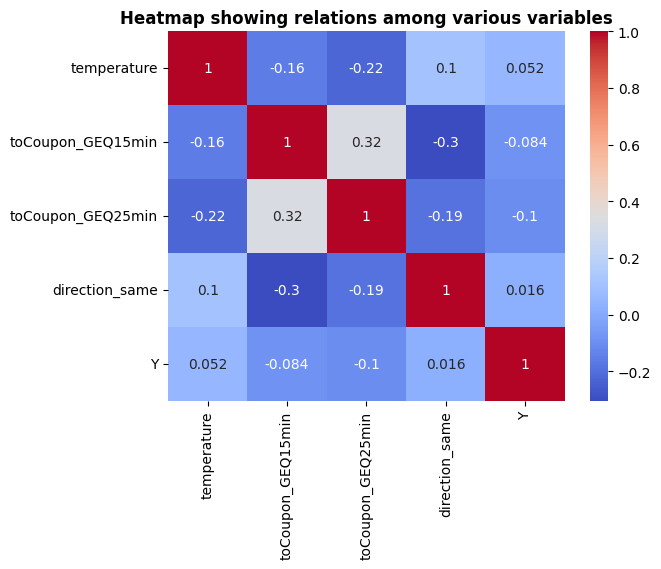

In [331]:
# Heatmap of the correlation between features.

# Plotting the heat map to show the correlation between the various features 
ax = plt.axes()
ax.set_facecolor("gray")
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, cbar=True,)
plt.title('Heatmap showing relations among various variables',fontweight='bold')

In [332]:
grouped_df = {}

for value in df:
    data_type = type(value)
    if data_type not in grouped_df:
        grouped_df[data_type] = []
    grouped_df[data_type].append(value)

print(grouped_df)

{<class 'str'>: ['destination', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'Y']}


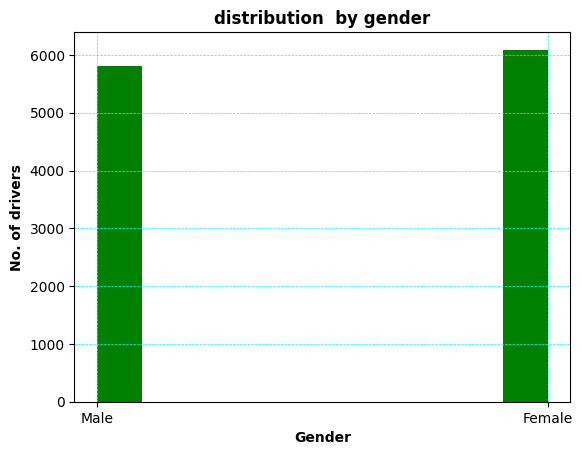

In [333]:
# Viewing the distribution of the gender using a histogram
df['gender'].hist(bins = 10, color = 'green')
plt.title('distribution  by gender', fontweight='bold')
plt.ylabel('No. of drivers', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.grid(color = 'cyan', linestyle = '--', linewidth = 0.5)

From the above gragh it shows more female drivers than the male

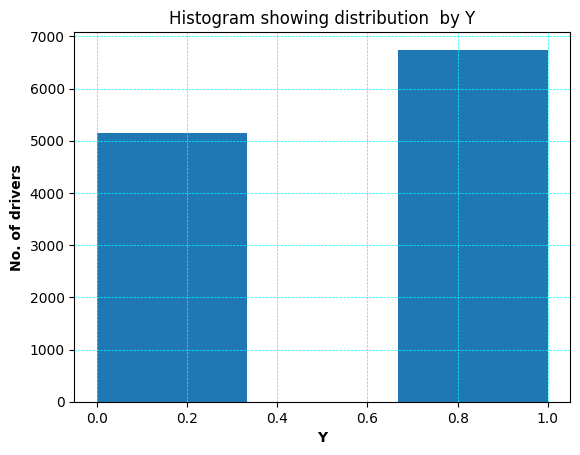

In [351]:
# Viewing the distribution of the Y using a histogram
df['Y'].hist(bins = 3)
plt.title('Histogram showing distribution  by Y')
plt.ylabel('No. of drivers',fontweight='bold')
plt.xlabel('Y',fontweight='bold')
plt.grid(color = 'cyan', linestyle = '--', linewidth = 0.5)

The graph above shows that there are more drivers accepting to take coupons

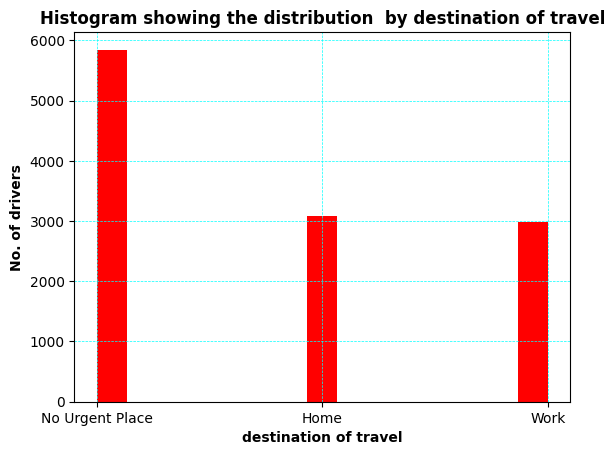

In [349]:
# Viewing the distribution of the destination using a histogram
df['destination'].hist(bins = "auto", color = 
                       'red')
plt.title('Histogram showing the distribution  by destination of travel', fontweight = 'bold')
plt.ylabel('No. of drivers', fontweight = 'bold')
plt.xlabel('destination of travel', fontweight = 'bold')
plt.grid(color = 'cyan', linestyle = '--', linewidth = 0.5)

The above graph shows there are more drivers who do not have urgent places to go to, followed by those going home and those going to work are the least in number

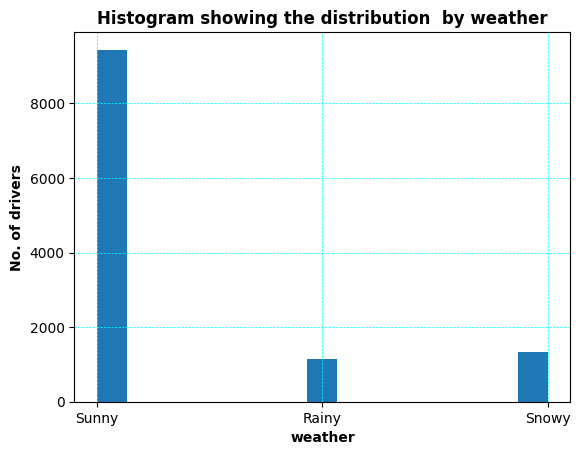

In [348]:
# Viewing the distribution of the destination using a histogram
df['weather'].hist(bins = "auto")
plt.title('Histogram showing the distribution  by weather', fontweight='bold')
plt.ylabel('No. of drivers',fontweight='bold')
plt.xlabel('weather',fontweight='bold')
plt.grid(color = 'cyan', linestyle = '--', linewidth = 0.5)

The graph above shows more drivers in the sunny weather , snowy and rainy respectively

 create two visuals that demonstrate key findings of interest to a stakeholder

Text(0.5, 1.0, 'Heatmap showing relations among various variables')

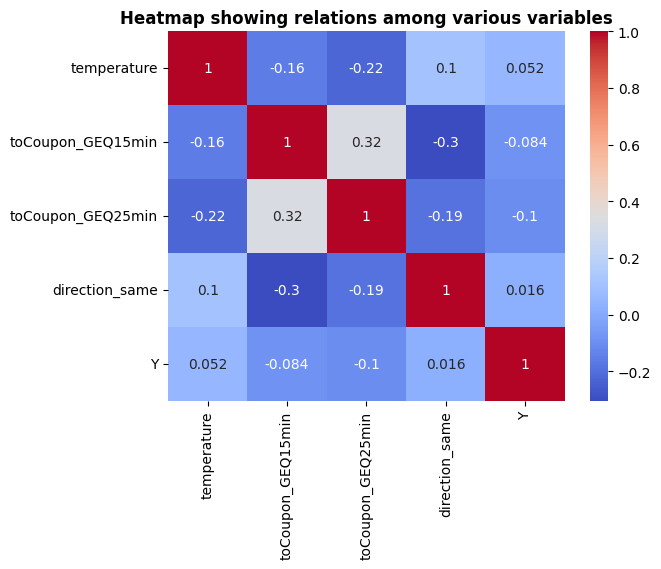

In [337]:
# Heatmap of the correlation between features.

# Plotting the heat map to show the correlation between the various features 
ax = plt.axes()
ax.set_facecolor("gray")
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, cbar=True,)
plt.title('Heatmap showing relations among various variables',fontweight='bold')

*  There is a relatively moderate relationship between the target (wether or not one will take a coupon) and the same direction, (whether the restaurant/bar is in the same direction as ones current destination)

*  There is a weak relationship between wether or not one will take the coupon and the distance being greater than 15 and 25 minutes to the bar/restaurant to use the coupon

*   There is a very moderate relationship between whether the restaurant/bar is in the same direction as ones current destination and the driving distance being greater than 15 minutes to the restaurant/bar to use the coupon compared to the driving distance being greater than 25 minutes to use the coupon
*   There is also a moderate relationship between the temperature and wether or not one will take a coupon.



*  There is a relatively strong relationship between temparature and wether or not one will take a coupon




Text(0.5, 1.0, 'Scatter showing relationship between time and target')

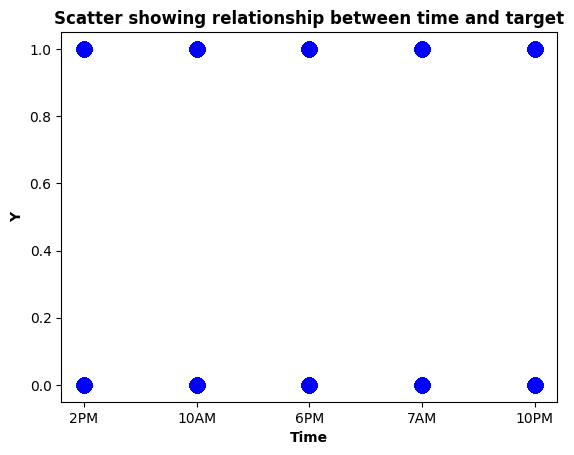

In [347]:
# Plot the scatter plot
df.plot.scatter(x='time', y='Y', s=100, c='blue')
# Add labels and title
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Y',fontweight='bold')
plt.title('Scatter showing relationship between time and target',fontweight='bold')


From the scatter, there is an equal distribution of drivers takinf decisions on wether to accept the coupon or not at all times, this implies that there is no high peak hour when drivers will be available 